# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [3]:
#Set units for search
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poronaysk
Processing Record 2 of Set 1 | pucallpa
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | balabac
Processing Record 10 of Set 1 | xanlar
Processing Record 11 of Set 1 | menongue
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | vincennes
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | waipawa
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | puerto carreno
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kurilsk
Processing Record 21 of Se

Processing Record 35 of Set 4 | lunenburg
Processing Record 36 of Set 4 | grand gaube
Processing Record 37 of Set 4 | harper
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | skjervoy
Processing Record 43 of Set 4 | kampong thum
Processing Record 44 of Set 4 | barcelos
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | bluff
Processing Record 48 of Set 4 | santarem
Processing Record 49 of Set 4 | byron bay
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | acajutla
Processing Record 2 of Set 5 | terrasini
Processing Record 3 of Set 5 | mathbaria
Processing Record 4 of Set 5 | port washington
Processing Record 5 of Set 5 | flagstaff
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of S

Processing Record 26 of Set 8 | moerai
Processing Record 27 of Set 8 | palana
Processing Record 28 of Set 8 | chicama
Processing Record 29 of Set 8 | chalchihuites
Processing Record 30 of Set 8 | ndjole
Processing Record 31 of Set 8 | gonaives
Processing Record 32 of Set 8 | dicabisagan
Processing Record 33 of Set 8 | awjilah
Processing Record 34 of Set 8 | polyarnyy
Processing Record 35 of Set 8 | vikhorevka
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | umm kaddadah
Processing Record 39 of Set 8 | bandarban
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | poum
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | aleksandrovskoye
Processing Record 44 of Set 8 | kaduqli
Processing Record 45 of Set 8 | lolua
City not found. Skipping...
Processing Record 46 of Set 8 | naron
Processing Record 47 of Set 8 | druzhba
Processing Record 48 of Set 8 | tangier
Processing Record 49

Processing Record 13 of Set 12 | lazo
Processing Record 14 of Set 12 | port-gentil
Processing Record 15 of Set 12 | bageshwar
Processing Record 16 of Set 12 | curup
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | ust-ilimsk
Processing Record 19 of Set 12 | lakselv
Processing Record 20 of Set 12 | xai-xai
Processing Record 21 of Set 12 | morant bay
Processing Record 22 of Set 12 | itarema
Processing Record 23 of Set 12 | ligayan
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | baruun-urt
Processing Record 26 of Set 12 | benjamin constant
Processing Record 27 of Set 12 | vysokogornyy
Processing Record 28 of Set 12 | gizo
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | deputatskiy
Processing Record 32 of Set 12 | canon city
Processing Record 33 of Set 12 | carutapera
Processing Record 34 of Set 12 | belmonte
Processing Record 35 of Set 12 | lasa
Processing Record 36 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poronaysk,49.2167,143.1167,-18.71,75,5,0.46,RU,1675043055
1,pucallpa,-8.3791,-74.5539,26.02,83,75,2.06,PE,1675043056
2,kahului,20.8947,-156.4700,23.80,79,40,4.12,US,1675043056
3,hilo,19.7297,-155.0900,22.38,88,20,0.45,US,1675042860
4,saint-pierre,-21.3393,55.4781,25.82,73,0,1.54,RE,1675043057


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poronaysk,49.2167,143.1167,-18.71,75,5,0.46,RU,1675043055
1,pucallpa,-8.3791,-74.5539,26.02,83,75,2.06,PE,1675043056
2,kahului,20.8947,-156.4700,23.80,79,40,4.12,US,1675043056
3,hilo,19.7297,-155.0900,22.38,88,20,0.45,US,1675042860
4,saint-pierre,-21.3393,55.4781,25.82,73,0,1.54,RE,1675043057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

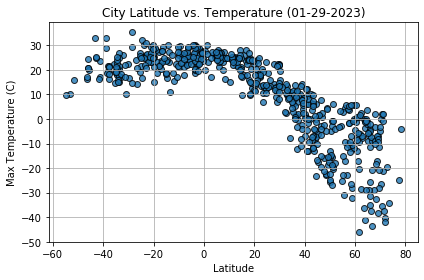

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

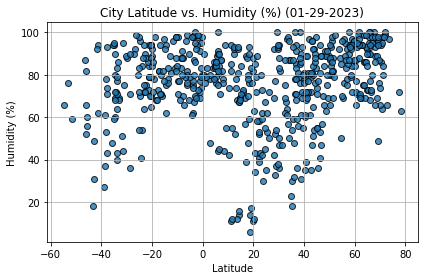

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

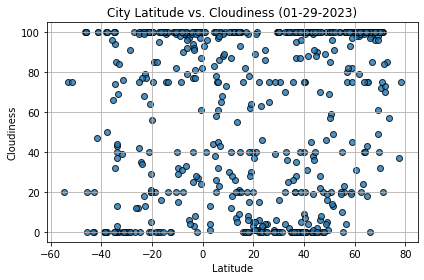

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

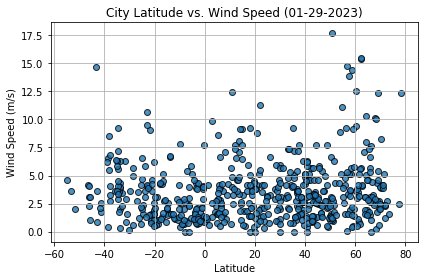

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poronaysk,49.2167,143.1167,-18.71,75,5,0.46,RU,1675043055
2,kahului,20.8947,-156.4700,23.80,79,40,4.12,US,1675043056
3,hilo,19.7297,-155.0900,22.38,88,20,0.45,US,1675042860
5,yellowknife,62.4560,-114.3525,-28.58,69,20,5.66,CA,1675042990
6,meulaboh,4.1363,96.1285,26.39,83,44,1.72,ID,1675043058


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pucallpa,-8.3791,-74.5539,26.02,83,75,2.06,PE,1675043056
4,saint-pierre,-21.3393,55.4781,25.82,73,0,1.54,RE,1675043057
7,broken hill,-31.9500,141.4333,25.92,51,39,6.34,AU,1675042825
10,menongue,-14.6585,17.6910,16.78,94,99,1.69,AO,1675043060
11,atuona,-9.8000,-139.0333,26.17,77,15,7.80,PF,1675043061


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.833639792349189
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


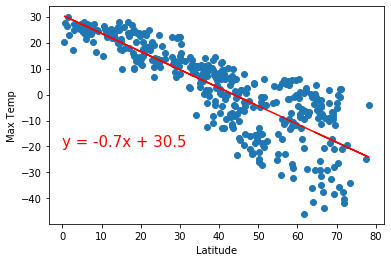

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")

The r-value is 0.39113988639120023
-----------------------------------
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


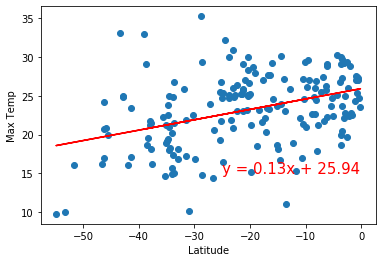

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.32329295587417844
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


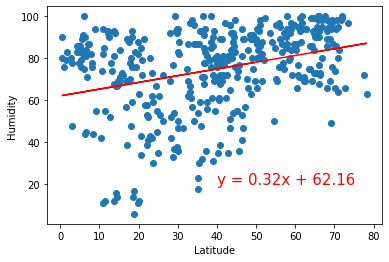

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.")

The r-value is 0.40867215227443565
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


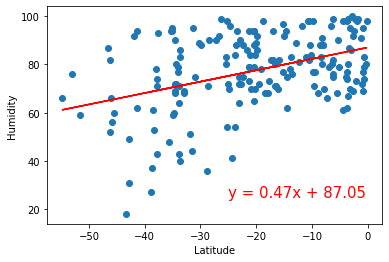

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.23893724293619575
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


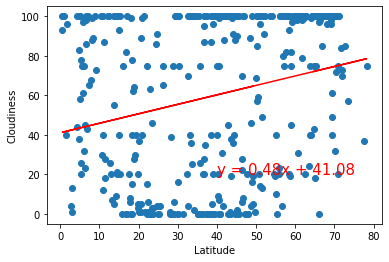

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

The r-value is 0.23663546086124862
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


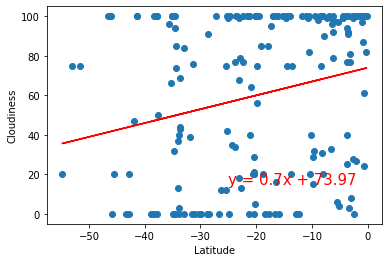

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.113130769498194
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


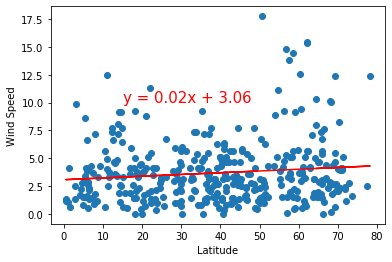

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

The r-value is -0.29387755289004525
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


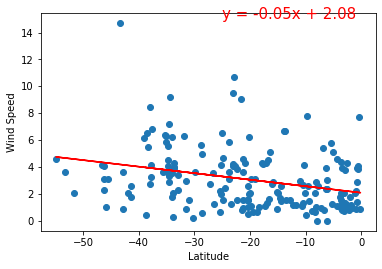

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE